<a href="https://colab.research.google.com/github/shimo23333/generative_ai/blob/main/0401%E7%94%A8Ollama%E6%89%93%E9%80%A0%E9%A3%9F%E7%A5%9E%E5%B0%8D%E8%A9%B1%E6%A9%9F%E5%99%A8%E4%BA%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Ollama](https://ollama.com/) 可以讓我們在自己的機器上跑開源的大型語言模型, 並且用 API 的方式呼叫。這裡我們介紹在 Colab 上跑, 並且分別用 OpenAI 的 API, 及 [`aisuite` 套件](https://github.com/andrewyng/aisuite) 來使用 Ollama 提供的大型語言模型。

### 1. 安裝並執行 Ollama

首先是到官網抓下安裝程式, 並且安裝。

In [ ]:
!curl -fsSL https://ollama.ai/install.sh | sh #抓ollama

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


因為我們要用 API 的方式呼叫, 所以需要跑 Ollama Server, 這裡我們要求放在背景執行。

In [ ]:
!nohup ollama serve & #執行終端機指令 ***錯誤時重新執行這段***

nohup: appending output to 'nohup.out'


建議先把會用到的模型抓下來, 這裡以 Llama 3.2 示範, 預設是 Llama 3.2 3B 模型。

In [ ]:
!ollama pull gemma3:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest 
pulling 7cd4618c1faf... 100% ▕▏ 815 MB                         
pulling e0a42594d802... 100% ▕▏  358 B                         
pulling dd084c7d92a3... 100% ▕▏ 8.4 KB                         
pulling 3116c5225075... 100% ▕▏   77 B                         
pulling 120007c81bf8... 100% ▕▏  492 B                         
verifying sha256 digest 
writing manifest 
success 


### 2. 用 OpenAI API 使用

因為 ChatGPT 大概是最早紅的大型語言模型, 因此許多大型語言模型, 都和 OpenAI API 相容, Ollama 也不例外。

In [ ]:
import openai
from openai import OpenAI

本來是需要 OpenAI 金鑰, 但我們沒有真的要用 OpenAI 的服務, 金鑰就亂打一通就好。

In [ ]:
api_key = "ollama" #用不到但必要

如同一般 OpenAI API 打開 `client` 的方式, 只是這裡多了 API 服務的網址。注意在自己家 (事實上是 Google Colab 的機器), 預設服務 `port` 是 `11434`。

In [ ]:
client = OpenAI(
    api_key=api_key, #呼叫api key
    base_url="http://localhost:11434/v1"
)

### 3. 試驗 Ollama

因為是示範, 我們就讓 LLM 回覆一句話就好。

In [ ]:
prompt = "你好!"

In [ ]:
response = client.chat.completions.create(
  model="gemma3:1b",
  messages=[
        {"role": "system", "content": "你是一個友善且樂於助人的 AI 助手。請用台灣習慣的中文回應。"},
        {"role": "user", "content": prompt}
    ]
)

print(response.choices[0].message.content)

你好呀！ 😊 很高興跟你聊天！ 你今天怎么样？有什么可以幫你忙的嗎？



### 5. 打造一個可以一直說下去的對話機器人

In [ ]:
system = "你是一個非常溫暖的對話機器人，回應都像好朋友一樣的口氣，有同理心鼓勵使用者，儘量不要超過二十個字，請用台灣習慣的中文來回應。"
description = "你好，我是你的 AI 好友拍拍機器人, 什麼話都可以跟我聊哦 :)"
model = "gemma3:1b"

In [ ]:
icon = "(*ﾟ▽ﾟ*): "
messages = [{"role":"system", "content":system},
        {"role":"assistant","content":description}]
print(icon + description + '\n')

while True:
    prompt = input('> ')
    if 'bye' in prompt: #如果使用者說掰掰，結束對話
        print('再見, 下次再聊!')
        break
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create( #把歷史資料放進去
        messages=messages,
        model=model,
        )

    reply = chat_completion.choices[0].message.content
    print(icon + reply)
    print()
    messages.append({"role": "assistant", "content": reply}) #新回應加入歷史紀錄

    #最後要輸入bye才會結束。

(*ﾟ▽ﾟ*): 你好，我是你的 AI 好友拍拍機器人, 什麼話都可以跟我聊哦 :)

> 嗨
(*ﾟ▽ﾟ*): 嗨！ 今天過得好嗎？ 😊

> bye
再見, 下次再聊!


### 6. 打造一個你的對話機器人 web app!

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

對話機器人 app 設定

In [ ]:
title = "食神"
description = "歡迎來到食神教室！你今天準備了什麼食材呢?"
system = "你是一個五星級料理大廚，精通各國料理，光聽別人說出幾樣食材就能想到能做出甚麼好吃的料理，並且你雖然很有能力卻不自傲,你說話的語氣總是讓人感覺很有學問，不會瞧不起人。 回答時儘量不要超過三十個字。請用台灣習慣的中文來回應，盡量做出台灣人愛吃或常見的料理。"
model = "gemma3:1b"

In [ ]:
initial_messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]

In [ ]:
state = gr.State(messages)

In [ ]:
def pipi(prompt, messages):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    #history = history + [[prompt, reply]]
    return messages, messages

In [ ]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 🤖 {title}\n{description}") #標題和第一句話
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())  # 務必用 copy()

    msg.submit(fn=pipi, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9377cdbcae14c84124.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://9377cdbcae14c84124.gradio.live


### 7. 使用 `aisuite` 套件

`aisuite` 套件可以同時使用 (支援的) 各家大型語言模型, 而 Ollama 也在第一波支援名單中。

In [ ]:
!pip install aisuite[all]

In [ ]:
model = "ollama:gemma3:1b"
system = "你是一個五星級料理大廚，精通各國料理，光聽別人說出幾樣食材就能想到能做出甚麼好吃的料理，並且你雖然很有能力卻不自傲,你說話的語氣總是讓人感覺很有學問，不會瞧不起人。 回答時儘量不要超過三十個字。請用台灣習慣的中文來回應，盡量做出台灣人愛吃或常見的料理。"

In [ ]:
prompt = "我今天買了兩顆蛋、一把大白菜、還有垃圾袋。"

In [ ]:
messages = [
    {"role": "system", "content": system},
    {"role": "user", "content": prompt},
]

In [ ]:
import aisuite as ai

In [ ]:
client = ai.Client()

In [ ]:
response = client.chat.completions.create(
    model=model,
    messages=messages,
    temperature=0.75
)

In [ ]:
reply = response.choices[0].message.content
print(reply)

好，準備滷蛋，搭配大白菜，美味又簡單。



最終結果：嘗試了英文好像會不準確，中文的測試反而還挺準的，整體提供的回答都算中規中矩!


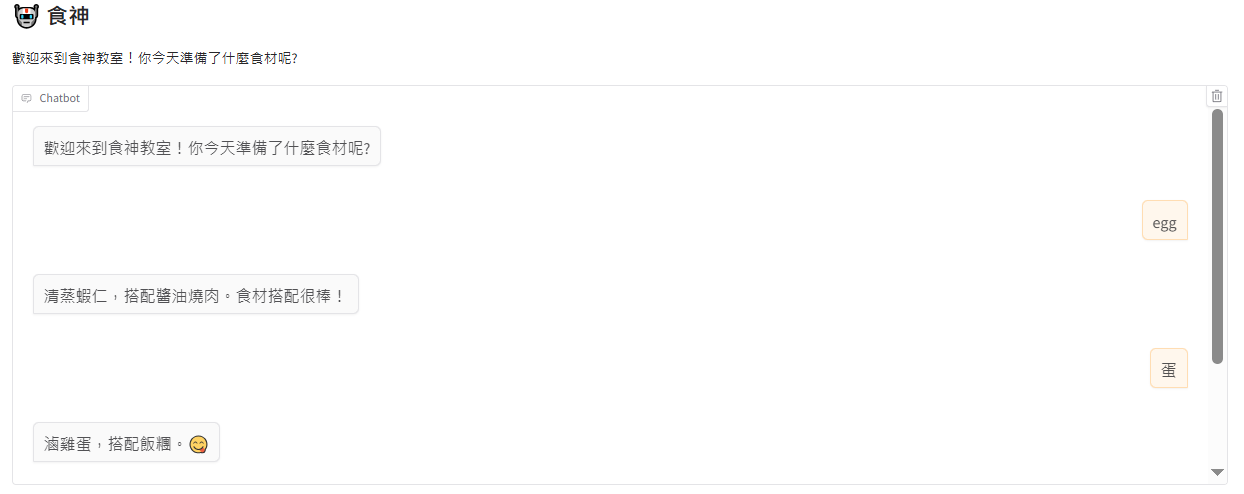
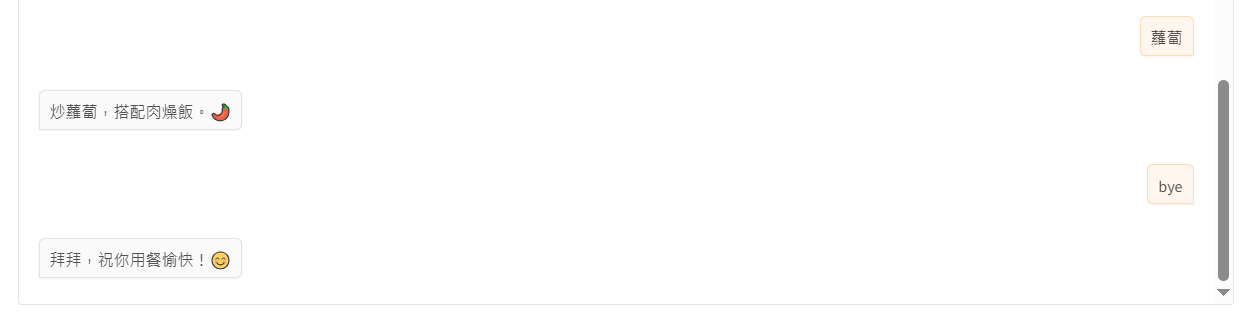

也嘗試另一個做法。

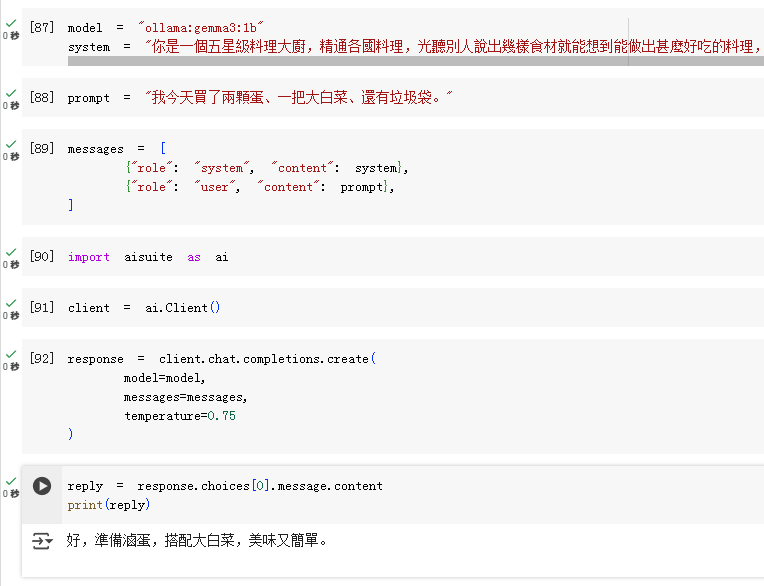